In [1]:
import os
import glob
import sys
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns

sys.path.append('../')
import src.utils as my_u
from src.utils import df_cp
from src.utils import df_log
from src.utils import df_total20000
from src.utils import df_minmax
from src.utils import df_l2norm
from src.utils import df_zscore
from src.utils import df_meansquare
from src.utils import run_plot

In [2]:
file_list = glob.glob("../data/tabular_muris/00_facs_raw_data/FACS/Pancreas-counts.csv")
sample_per_class = 200

labels = []
total_data = pd.DataFrame()
for ff in file_list:
    data = pd.read_csv(ff, sep=',', index_col=0, header=0)
    data = data.transpose()
    c = list(range(data.shape[0]))
    total_data = pd.concat([total_data, data.iloc[c,]], axis=0)
    labels += [ff.split('/')[-1].rstrip('-counts.csv')] * sample_per_class #data.shape[0]

label_set = set(labels)
print(label_set)


annot_label = pd.read_csv('../data/tabular_muris/00_facs_raw_data/annotations_FACS.csv', sep=',', index_col=0, header=0)
com = annot_label['tissue'].index.intersection(total_data.index)
m = annot_label.filter(com, axis=0)
#print(m)
total_data = total_data.filter(com, axis=0)
total_data = pd.concat([total_data, m['cell_ontology_class']],axis =1)

tissue = labels
labels = total_data['cell_ontology_class']
labels = labels.values.tolist()

total_data.pop('cell_ontology_class')
total_data.pop('zsGreen_transgene')
print(set(labels))

{'Pancrea'}
{'pancreatic stellate cell', 'pancreatic A cell', 'pancreatic D cell', 'type B pancreatic cell', 'endothelial cell', 'leukocyte', 'pancreatic acinar cell', 'pancreatic PP cell', 'pancreatic ductal cell'}


# tsne + kmeans
kmean #cluster: (7, 0.5231703253067425, 0.52891976, 0)
kmean #cluster: (12, 0.46353512445056133, 0.46174148, 0)
kmean #cluster: (5, 0.7090640330942799, 0.59020835, 0)
kmean #cluster: (6, 0.6504237360681062, 0.581855, 0)
kmean #cluster: (4, 0.6473629814355942, 0.5991681, 0)
kmean #cluster: (11, 0.4606569685973871, 0.43748435, 0)
kmean #cluster: (4, 0.6752082330737015, 0.51773167, 0)
kmean #cluster: (7, 0.6416596077854859, 0.5404811, 0)
kmean #cluster: (4, 0.6377134292870823, 0.5315973, 0)
kmean #cluster: (10, 0.7901247513661487, 0.5575467, 0)
kmean #cluster: (4, 0.6473629814355942, 0.5841984, 0)
kmean #cluster: (12, 0.7743996813463822, 0.6269601, 0)
kmean #cluster: (9, 0.5393172109036771, 0.62759894, 0)
kmean #cluster: (12, 0.7699587503486586, 0.5665556, 0)
kmean #cluster: (4, 0.6483256043976207, 0.6021117, 0)
kmean #cluster: (10, 0.8073615623278027, 0.620982, 0)
kmean #cluster: (4, 0.6300074314830234, 0.58346546, 0)
kmean #cluster: (12, 0.7266404477794902, 0.54025644, 0)
kmean #cluster: (4, 0.6258982198359847, 0.53295577, 0)
kmean #cluster: (12, 0.7566025784920681, 0.62277704, 0)

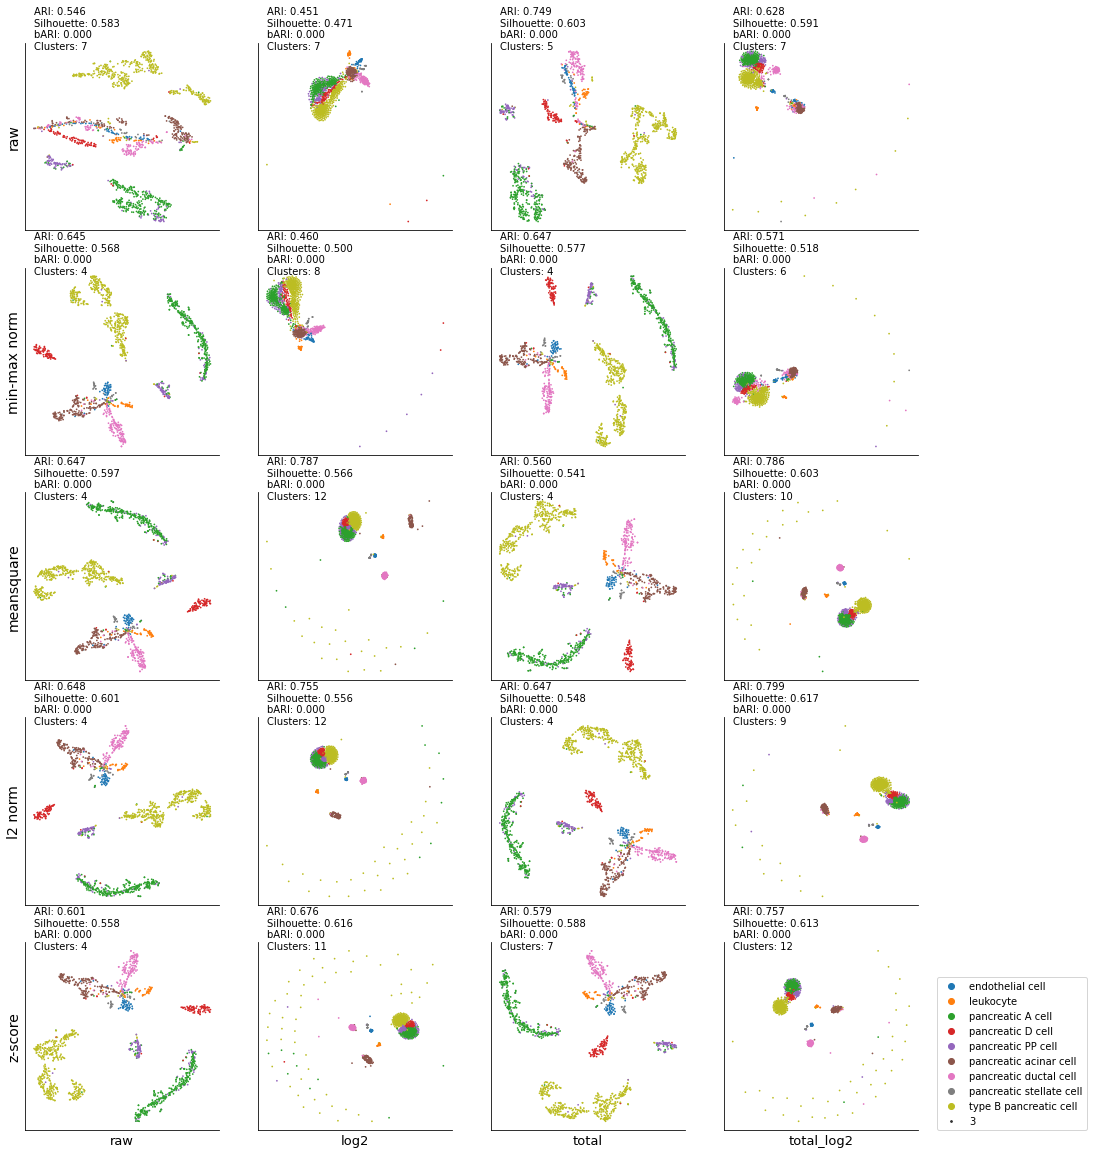

In [6]:
latent_space = TSNE(n_components=2)
#latent_space = UMAP(n_components=2, init='spectral', random_state=0)
clustering_method = 'kmean'

############################################
plt.figure(figsize=(16,20))
ax00 = plt.subplot2grid((5,4), (0,0)) 
ax10 = plt.subplot2grid((5,4), (0,1))  
ax20 = plt.subplot2grid((5,4), (0,2))  
ax30 = plt.subplot2grid((5,4), (0,3))  

ax01 = plt.subplot2grid((5,4), (1,0)) 
ax11 = plt.subplot2grid((5,4), (1,1))  
ax21 = plt.subplot2grid((5,4), (1,2))  
ax31 = plt.subplot2grid((5,4), (1,3))  

ax02 = plt.subplot2grid((5,4), (2,0)) 
ax12 = plt.subplot2grid((5,4), (2,1))  
ax22 = plt.subplot2grid((5,4), (2,2))  
ax32 = plt.subplot2grid((5,4), (2,3))  

ax03 = plt.subplot2grid((5,4), (3,0)) 
ax13 = plt.subplot2grid((5,4), (3,1))  
ax23 = plt.subplot2grid((5,4), (3,2))  
ax33 = plt.subplot2grid((5,4), (3,3))

ax04 = plt.subplot2grid((5,4), (4,0)) 
ax14 = plt.subplot2grid((5,4), (4,1))  
ax24 = plt.subplot2grid((5,4), (4,2))  
ax34 = plt.subplot2grid((5,4), (4,3))

l = []
############################################
l.append(run_plot(df_cp(total_data), \
         ax00, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_cp(total_data)), \
         ax10, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_total20000(df_cp(total_data)), \
         ax20, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_total20000(df_cp(total_data))), \
         ax30, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_minmax(df_cp(total_data)), \
         ax01, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_cp(total_data))), \
         ax11, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_total20000(df_cp(total_data))), \
         ax21, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_total20000(df_cp(total_data)))), \
         ax31, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_meansquare(df_cp(total_data)), \
         ax02, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_cp(total_data))), \
         ax12, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_total20000(df_cp(total_data))), \
         ax22, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_total20000(df_cp(total_data)))), \
         ax32, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_l2norm(df_cp(total_data)), \
         ax03, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_cp(total_data))), \
         ax13, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_total20000(df_cp(total_data))), \
         ax23, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_total20000(df_cp(total_data)))), \
         ax33, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_zscore(df_cp(total_data)), \
         ax04, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_cp(total_data))), \
         ax14, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_total20000(df_cp(total_data))), \
         ax24, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_total20000(df_cp(total_data)))), \
         ax34, labels, latent_space, clustering_method)
        )
############################################
ax00.set_ylabel('raw' , fontsize=14)
ax01.set_ylabel('min-max norm' , fontsize=14)
ax02.set_ylabel('meansquare' , fontsize=14)
ax03.set_ylabel('l2 norm' , fontsize=14)
ax04.set_ylabel('z-score' , fontsize=14)

ax04.set_xlabel('raw', fontsize=13)
ax14.set_xlabel('log2', fontsize=13)
ax24.set_xlabel('total', fontsize=13)
ax34.set_xlabel('total_log2', fontsize=13)
ax34.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)

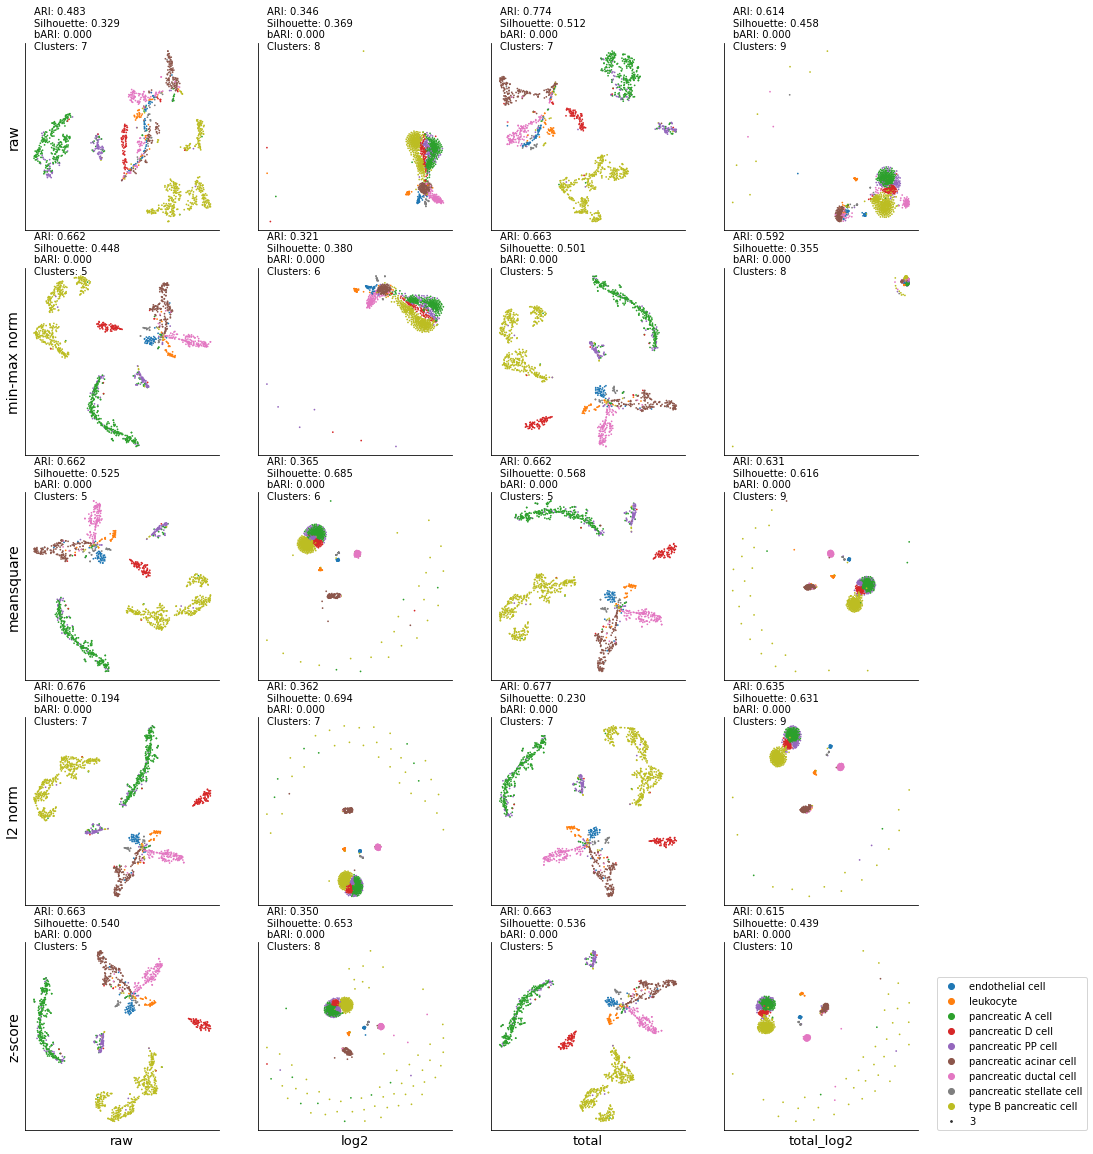

In [3]:
latent_space = TSNE(n_components=2)
#latent_space = UMAP(n_components=2, init='spectral', random_state=0)
clustering_method = 'dbscan'

############################################
plt.figure(figsize=(16,20))
ax00 = plt.subplot2grid((5,4), (0,0)) 
ax10 = plt.subplot2grid((5,4), (0,1))  
ax20 = plt.subplot2grid((5,4), (0,2))  
ax30 = plt.subplot2grid((5,4), (0,3))  

ax01 = plt.subplot2grid((5,4), (1,0)) 
ax11 = plt.subplot2grid((5,4), (1,1))  
ax21 = plt.subplot2grid((5,4), (1,2))  
ax31 = plt.subplot2grid((5,4), (1,3))  

ax02 = plt.subplot2grid((5,4), (2,0)) 
ax12 = plt.subplot2grid((5,4), (2,1))  
ax22 = plt.subplot2grid((5,4), (2,2))  
ax32 = plt.subplot2grid((5,4), (2,3))  

ax03 = plt.subplot2grid((5,4), (3,0)) 
ax13 = plt.subplot2grid((5,4), (3,1))  
ax23 = plt.subplot2grid((5,4), (3,2))  
ax33 = plt.subplot2grid((5,4), (3,3))

ax04 = plt.subplot2grid((5,4), (4,0)) 
ax14 = plt.subplot2grid((5,4), (4,1))  
ax24 = plt.subplot2grid((5,4), (4,2))  
ax34 = plt.subplot2grid((5,4), (4,3))

l = []
############################################
l.append(run_plot(df_cp(total_data), \
         ax00, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_cp(total_data)), \
         ax10, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_total20000(df_cp(total_data)), \
         ax20, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_total20000(df_cp(total_data))), \
         ax30, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_minmax(df_cp(total_data)), \
         ax01, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_cp(total_data))), \
         ax11, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_total20000(df_cp(total_data))), \
         ax21, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_total20000(df_cp(total_data)))), \
         ax31, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_meansquare(df_cp(total_data)), \
         ax02, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_cp(total_data))), \
         ax12, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_total20000(df_cp(total_data))), \
         ax22, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_total20000(df_cp(total_data)))), \
         ax32, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_l2norm(df_cp(total_data)), \
         ax03, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_cp(total_data))), \
         ax13, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_total20000(df_cp(total_data))), \
         ax23, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_total20000(df_cp(total_data)))), \
         ax33, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_zscore(df_cp(total_data)), \
         ax04, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_cp(total_data))), \
         ax14, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_total20000(df_cp(total_data))), \
         ax24, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_total20000(df_cp(total_data)))), \
         ax34, labels, latent_space, clustering_method)
        )
############################################
ax00.set_ylabel('raw' , fontsize=14)
ax01.set_ylabel('min-max norm' , fontsize=14)
ax02.set_ylabel('meansquare' , fontsize=14)
ax03.set_ylabel('l2 norm' , fontsize=14)
ax04.set_ylabel('z-score' , fontsize=14)

ax04.set_xlabel('raw', fontsize=13)
ax14.set_xlabel('log2', fontsize=13)
ax24.set_xlabel('total', fontsize=13)
ax34.set_xlabel('total_log2', fontsize=13)
ax34.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)

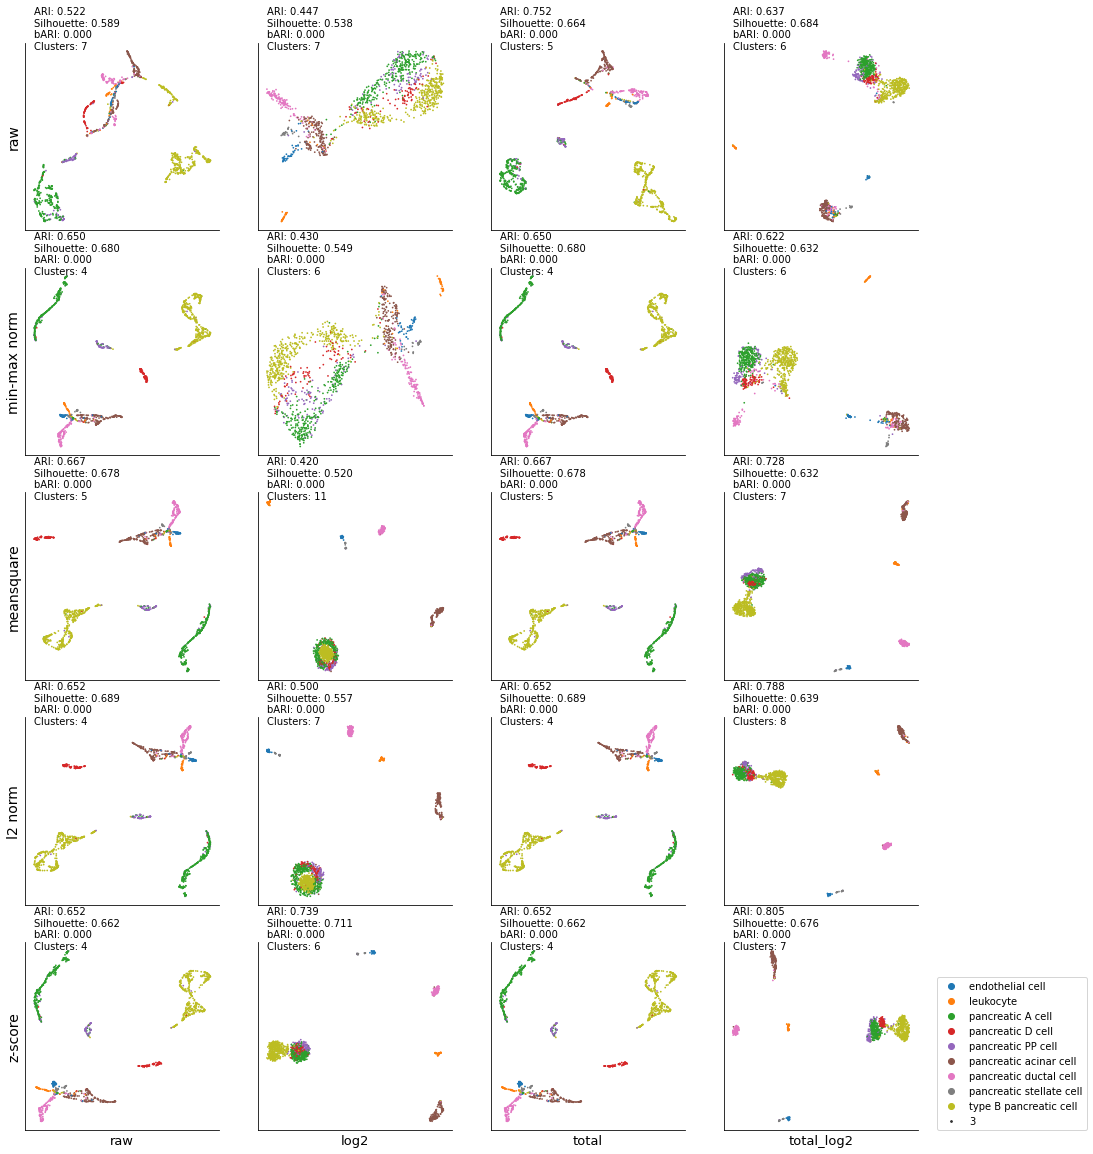

In [4]:
#latent_space = TSNE(n_components=2)
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
clustering_method = 'kmean'

############################################
plt.figure(figsize=(16,20))
ax00 = plt.subplot2grid((5,4), (0,0)) 
ax10 = plt.subplot2grid((5,4), (0,1))  
ax20 = plt.subplot2grid((5,4), (0,2))  
ax30 = plt.subplot2grid((5,4), (0,3))  

ax01 = plt.subplot2grid((5,4), (1,0)) 
ax11 = plt.subplot2grid((5,4), (1,1))  
ax21 = plt.subplot2grid((5,4), (1,2))  
ax31 = plt.subplot2grid((5,4), (1,3))  

ax02 = plt.subplot2grid((5,4), (2,0)) 
ax12 = plt.subplot2grid((5,4), (2,1))  
ax22 = plt.subplot2grid((5,4), (2,2))  
ax32 = plt.subplot2grid((5,4), (2,3))  

ax03 = plt.subplot2grid((5,4), (3,0)) 
ax13 = plt.subplot2grid((5,4), (3,1))  
ax23 = plt.subplot2grid((5,4), (3,2))  
ax33 = plt.subplot2grid((5,4), (3,3))

ax04 = plt.subplot2grid((5,4), (4,0)) 
ax14 = plt.subplot2grid((5,4), (4,1))  
ax24 = plt.subplot2grid((5,4), (4,2))  
ax34 = plt.subplot2grid((5,4), (4,3))

l = []
############################################
l.append(run_plot(df_cp(total_data), \
         ax00, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_cp(total_data)), \
         ax10, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_total20000(df_cp(total_data)), \
         ax20, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_total20000(df_cp(total_data))), \
         ax30, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_minmax(df_cp(total_data)), \
         ax01, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_cp(total_data))), \
         ax11, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_total20000(df_cp(total_data))), \
         ax21, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_total20000(df_cp(total_data)))), \
         ax31, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_meansquare(df_cp(total_data)), \
         ax02, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_cp(total_data))), \
         ax12, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_total20000(df_cp(total_data))), \
         ax22, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_total20000(df_cp(total_data)))), \
         ax32, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_l2norm(df_cp(total_data)), \
         ax03, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_cp(total_data))), \
         ax13, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_total20000(df_cp(total_data))), \
         ax23, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_total20000(df_cp(total_data)))), \
         ax33, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_zscore(df_cp(total_data)), \
         ax04, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_cp(total_data))), \
         ax14, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_total20000(df_cp(total_data))), \
         ax24, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_total20000(df_cp(total_data)))), \
         ax34, labels, latent_space, clustering_method)
        )
############################################
ax00.set_ylabel('raw' , fontsize=14)
ax01.set_ylabel('min-max norm' , fontsize=14)
ax02.set_ylabel('meansquare' , fontsize=14)
ax03.set_ylabel('l2 norm' , fontsize=14)
ax04.set_ylabel('z-score' , fontsize=14)

ax04.set_xlabel('raw', fontsize=13)
ax14.set_xlabel('log2', fontsize=13)
ax24.set_xlabel('total', fontsize=13)
ax34.set_xlabel('total_log2', fontsize=13)
ax34.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)

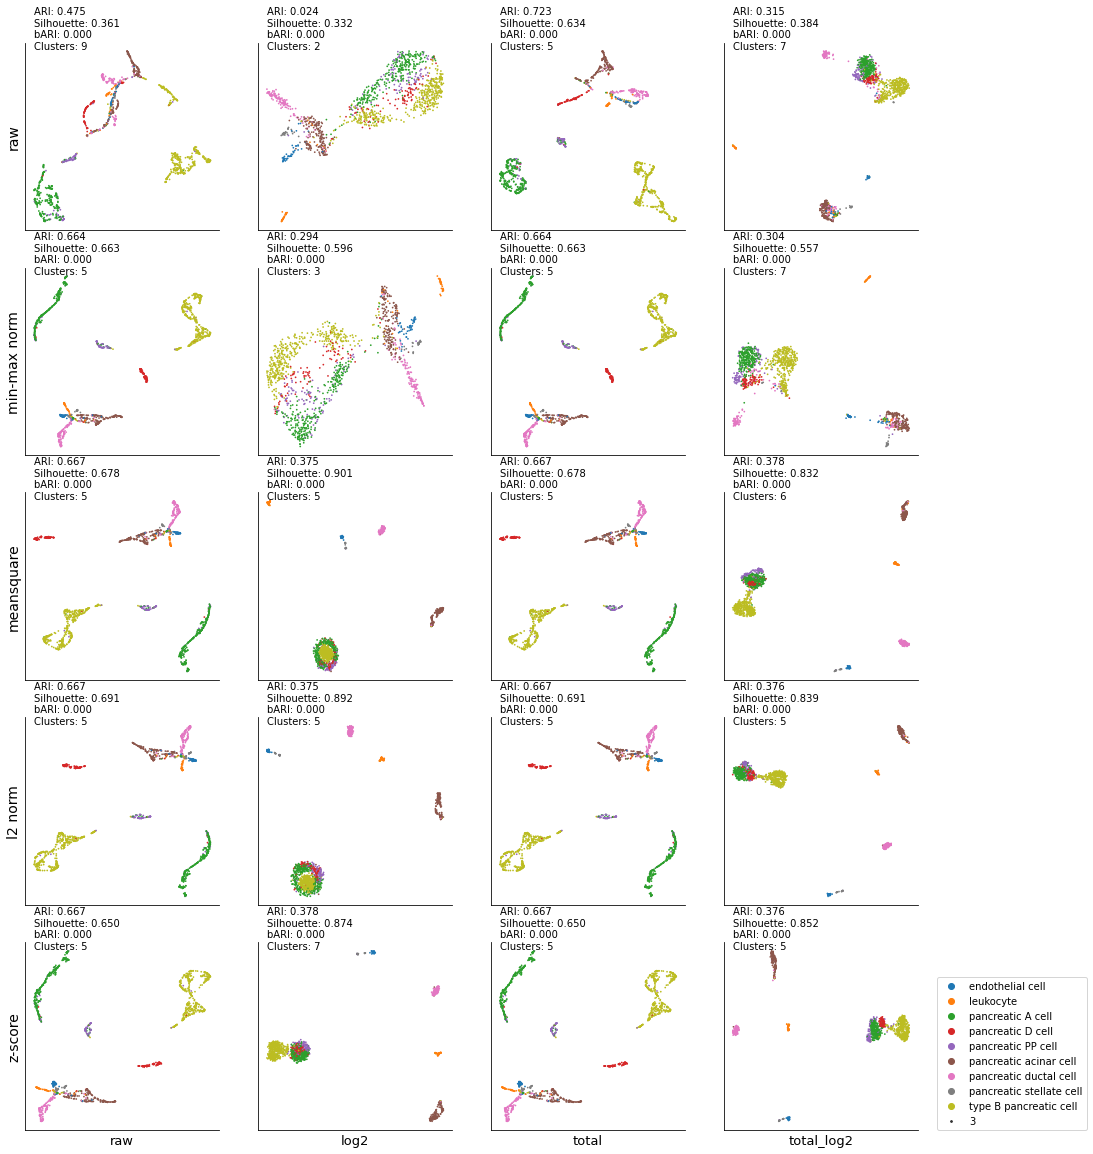

In [5]:
#latent_space = TSNE(n_components=2)
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
clustering_method = 'dbscan'

############################################
plt.figure(figsize=(16,20))
ax00 = plt.subplot2grid((5,4), (0,0)) 
ax10 = plt.subplot2grid((5,4), (0,1))  
ax20 = plt.subplot2grid((5,4), (0,2))  
ax30 = plt.subplot2grid((5,4), (0,3))  

ax01 = plt.subplot2grid((5,4), (1,0)) 
ax11 = plt.subplot2grid((5,4), (1,1))  
ax21 = plt.subplot2grid((5,4), (1,2))  
ax31 = plt.subplot2grid((5,4), (1,3))  

ax02 = plt.subplot2grid((5,4), (2,0)) 
ax12 = plt.subplot2grid((5,4), (2,1))  
ax22 = plt.subplot2grid((5,4), (2,2))  
ax32 = plt.subplot2grid((5,4), (2,3))  

ax03 = plt.subplot2grid((5,4), (3,0)) 
ax13 = plt.subplot2grid((5,4), (3,1))  
ax23 = plt.subplot2grid((5,4), (3,2))  
ax33 = plt.subplot2grid((5,4), (3,3))

ax04 = plt.subplot2grid((5,4), (4,0)) 
ax14 = plt.subplot2grid((5,4), (4,1))  
ax24 = plt.subplot2grid((5,4), (4,2))  
ax34 = plt.subplot2grid((5,4), (4,3))

l = []
############################################
l.append(run_plot(df_cp(total_data), \
         ax00, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_cp(total_data)), \
         ax10, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_total20000(df_cp(total_data)), \
         ax20, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_total20000(df_cp(total_data))), \
         ax30, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_minmax(df_cp(total_data)), \
         ax01, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_cp(total_data))), \
         ax11, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_total20000(df_cp(total_data))), \
         ax21, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_total20000(df_cp(total_data)))), \
         ax31, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_meansquare(df_cp(total_data)), \
         ax02, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_cp(total_data))), \
         ax12, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_total20000(df_cp(total_data))), \
         ax22, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_total20000(df_cp(total_data)))), \
         ax32, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_l2norm(df_cp(total_data)), \
         ax03, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_cp(total_data))), \
         ax13, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_total20000(df_cp(total_data))), \
         ax23, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_total20000(df_cp(total_data)))), \
         ax33, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_zscore(df_cp(total_data)), \
         ax04, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_cp(total_data))), \
         ax14, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_total20000(df_cp(total_data))), \
         ax24, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_total20000(df_cp(total_data)))), \
         ax34, labels, latent_space, clustering_method)
        )
############################################
ax00.set_ylabel('raw' , fontsize=14)
ax01.set_ylabel('min-max norm' , fontsize=14)
ax02.set_ylabel('meansquare' , fontsize=14)
ax03.set_ylabel('l2 norm' , fontsize=14)
ax04.set_ylabel('z-score' , fontsize=14)

ax04.set_xlabel('raw', fontsize=13)
ax14.set_xlabel('log2', fontsize=13)
ax24.set_xlabel('total', fontsize=13)
ax34.set_xlabel('total_log2', fontsize=13)
ax34.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)